# CPSC 8810 Project 2-2: Two Layer Neural Network

Before we start, please put your name and CUID in following format

: Firstname LASTNAME, #00000000   //   e.g.) Justin JOHNSON, #12345678

**Your Answer:**   
Xusheng Ai, #25337335

# Setup Code
Before getting started, we need to run some boilerplate code to set up our environment, same as Assignment 1. You'll need to rerun this setup code each time you start the notebook.

First, run this cell load the autoreload extension. This allows us to edit .py source files, and re-import them into the notebook for a seamless editing and debugging experience.

In [1]:
from keras.datasets import mnist

2022-10-14 21:23:10.013920: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-14 21:23:10.508322: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-14 21:23:11.876271: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /software/spackages/linux-rocky8-x86_64/gcc-9.5.0/cudnn-8.0.5.39-11.1-mfv3zngnnvyqht45cwzdyaop4ws25j6w/lib64:/software/spackages/linux-rocky8-x86_64/gcc-9.5.0/cuda-11.1.1-gvdep34zxhk3vvzcg3dti7ytgmuf5547/

In [2]:
from keras.utils import to_categorical
import numpy as np
from keras.layers import Dense, Activation, Flatten
from keras.models import Sequential
import matplotlib.pyplot as plt

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# Convert y_train into one-hot format
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
y_train = np.array(temp)
# Convert y_test into one-hot format
temp = []
for i in range(len(y_test)):    
    temp.append(to_categorical(y_test[i], num_classes=10))
y_test = np.array(temp)

In [5]:
# Create simple Neural Network model
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(7, activation='relu'))
model.add(Dense(10, activation='softmax'))

2022-10-14 21:23:29.621809: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-14 21:23:30.536349: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14499 MB memory:  -> device: 0, name: Tesla V100-PCIE-16GB, pci bus id: 0000:3b:00.0, compute capability: 7.0


In [7]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['acc'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 7)                 5495      
                                                                 
 dense_1 (Dense)             (None, 10)                80        
                                                                 
Total params: 5,575
Trainable params: 5,575
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.fit(X_train, y_train, epochs=100, 
          validation_data=(X_test,y_test))

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3080 - acc: 0.2174 - val_loss: 1.9171 - val_acc: 0.2525
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 1.8927 - acc: 0.2723 - val_loss: 1.8397 - val_acc: 0.2861
Epoch 3/100
1875/1875 [==============================] - 3s 2ms/step - loss: 1.8258 - acc: 0.2819 - val_loss: 1.7984 - val_acc: 0.2925
Epoch 4/100
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7243 - acc: 0.3199 - val_loss: 1.6658 - val_acc: 0.3461
Epoch 5/100
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5842 - acc: 0.3512 - val_loss: 1.5819 - val_acc: 0.3435
Epoch 6/100
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5290 - acc: 0.3593 - val_loss: 1.5325 - val_acc: 0.3596
Epoch 7/100
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4873 - acc: 0.3699 - val_loss: 1.5088 - val_acc: 0.3662
Epoch 8/100
1875/1875 [==============================] 

In [10]:
w1 = np.array(model.layers[1].get_weights())

/local_scratch/pbs.211258.pbs02/ipykernel_39306/314487253.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  w1 = np.array(model.layers[1].get_weights())


In [14]:
a1 = w1[0].reshape(28,28,7)[:,:]

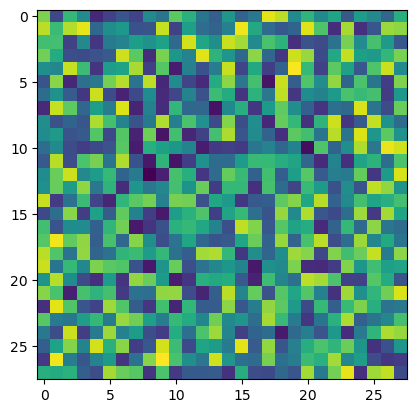

In [20]:
for i in range(7):
    plt.imshow(w1[0].reshape(28,28,7)[:,:,i])
    plt.show()

In [13]:
w2 = np.array(model.layers[2].get_weights())

/local_scratch/pbs.211177.pbs02/ipykernel_1223322/1863653866.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  w2 = np.array(model.layers[2].get_weights())


In [15]:
w2[0].shape

(7, 10)

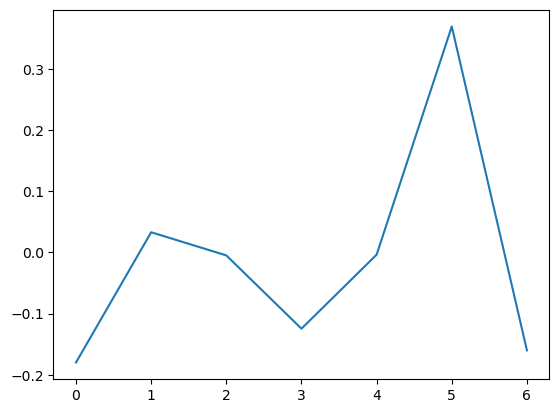

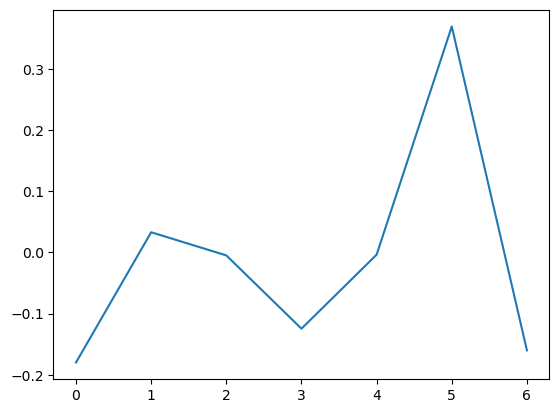

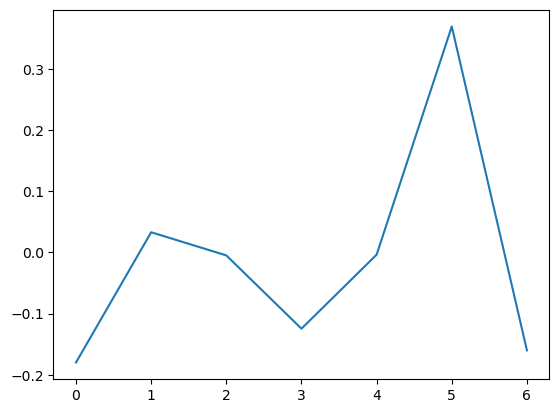

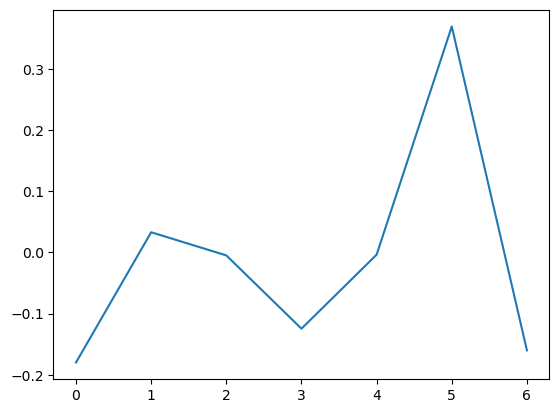

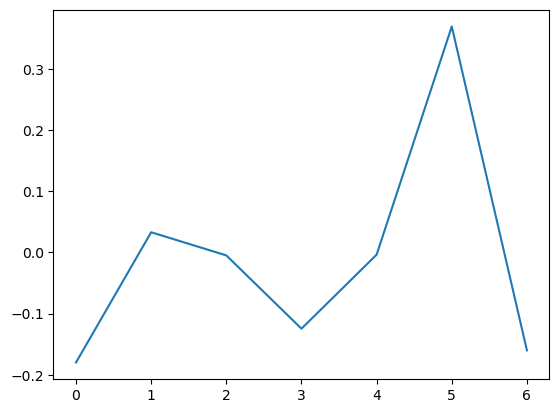

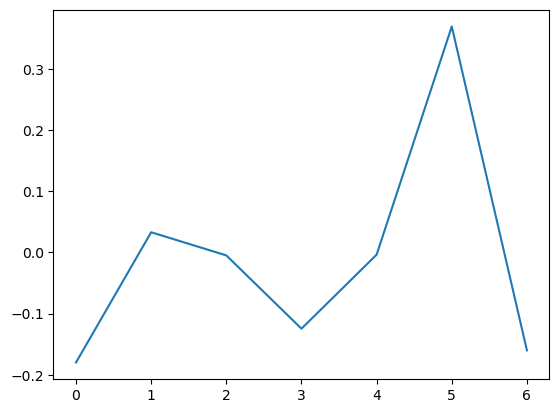

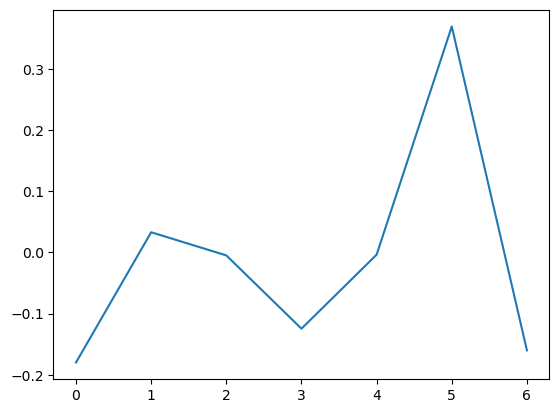

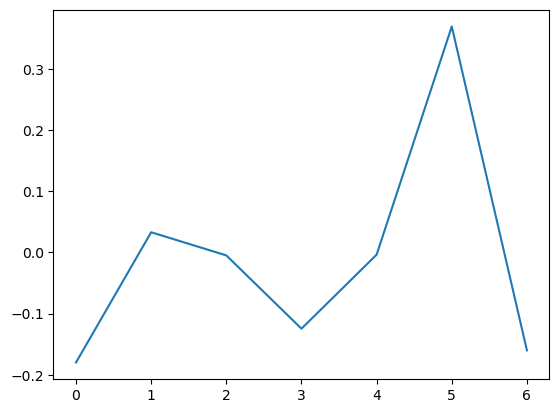

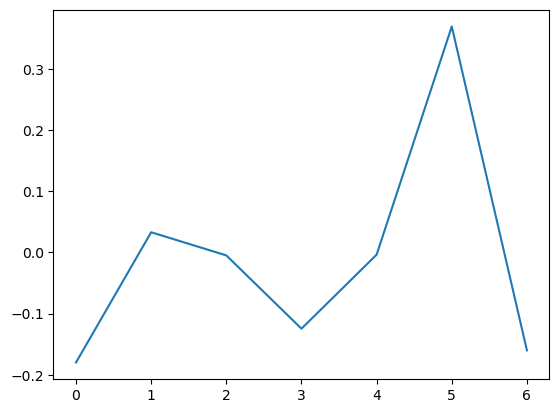

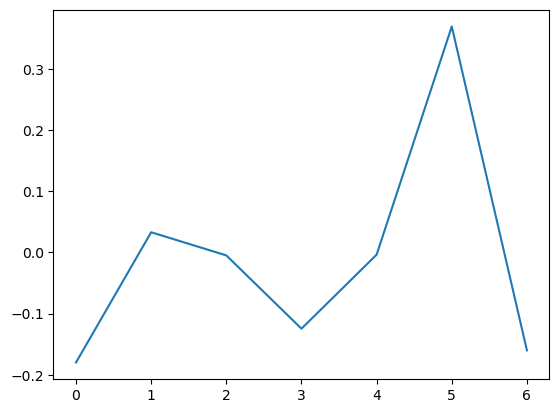

In [18]:
for i in range(10):
    plt.plot(w2[0][:,9])
    plt.show()

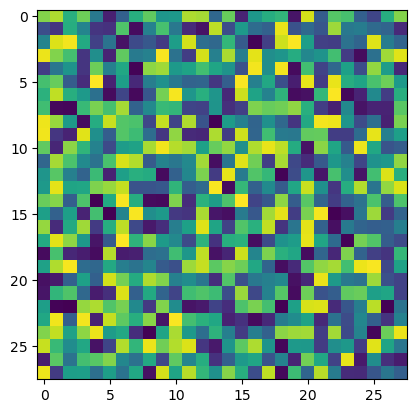

In [103]:
plt.imshow(a1[:,:,6])
plt.show()

## Miscellaneous

Run some setup code for this notebook: Import some useful packages and increase the default figure size.

In [2]:
import cpsc8810
import torch
import matplotlib.pyplot as plt
import statistics
import random
import time
%matplotlib inline


plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['font.size'] = 16
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

We will use GPUs to accelerate our computation in this notebook. Run the following to make sure GPUs are enabled:

In [3]:
if torch.cuda.is_available:
  print('Good to go!')
else:
  print('Please set GPU via Edit -> Notebook Settings.')

Good to go!


# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

We train the network with a softmax loss function and L2 regularization on the weight matrices. The network uses a ReLU nonlinearity after the first fully connected layer. 

In other words, the network has the following architecture:

  input - fully connected layer - ReLU - fully connected layer - softmax

The outputs of the second fully-connected layer are the scores for each class.

**Note**: When you implment the regularization over W, **please DO NOT multiply the regularization term by 1/2** (no coefficient). 






## Play with a toy data

The inputs to our network will be a batch of $N$ (`num_inputs`) $D$-dimensional vectors (`input_size`); the hidden layer will have $H$ hidden units (`hidden_size`), and we will predict classification scores for $C$ categories (`num_classes`). This means that the learnable weights and biases of the network will have the following shapes:

*   W1: First layer weights; has shape (D, H)
*   b1: First layer biases; has shape (H,)
*   W2: Second layer weights; has shape (H, C)
*   b2: Second layer biases; has shape (C,)

We will use `a2_helpers.get_toy_data` function to generate random weights for a small toy model while we implement the model.

### Forward pass: compute scores
Like in the Linear Classifiers exercise, we want to write a function that takes as input the model weights and a batch of images and labels, and returns the loss and the gradient of the loss with respect to each model parameter.

However rather than attempting to implement the entire function at once, we will take a staged approach and ask you to implement the full forward and backward pass one step at a time.

First we will implement the forward pass of the network which uses the weights and biases to compute scores for all inputs in `nn_forward_pass`.

Compute the scores and compare with the answer. The distance gap should be smaller than 1e-10.

In [6]:
toy_X

tensor([[ 25.4410,  -7.1635,  -4.9337,   1.2671],
        [  1.0136,  -4.0353,   9.0226,   8.0993],
        [ -6.8838,   1.3724,  10.3774,   0.9255],
        [ -3.7518,  -0.9082,  20.6391, -18.1638],
        [ -2.7188,   2.8113, -10.3986,   7.7653]], device='cuda:0')

In [3]:
import cpsc8810
from cpsc8810.a2_helpers import get_toy_data
from two_layer_net import nn_forward_pass

cpsc8810.reset_seed(0)
toy_X, toy_y, params = get_toy_data()




In [ ]:
# YOUR_TURN: Implement the score computation part of nn_forward_pass
scores, _ = nn_forward_pass(params, toy_X)
print('Your scores:')
print(scores)
print(scores.dtype)
print()
print('correct scores:')
correct_scores = torch.tensor([
        [ 9.7003e-08, -1.1143e-07, -3.9961e-08],
        [-7.4297e-08,  1.1502e-07,  1.5685e-07],
        [-2.5860e-07,  2.2765e-07,  3.2453e-07],
        [-4.7257e-07,  9.0935e-07,  4.0368e-07],
        [-1.8395e-07,  7.9303e-08,  6.0360e-07]], dtype=torch.float32, device=scores.device)
print(correct_scores)
print()

# The difference should be very small. We get < 1e-10
scores_diff = (scores - correct_scores).abs().sum().item()
print('Difference between your scores and correct scores: %.2e' % scores_diff)

### Forward pass: compute loss
Now, we implement the first part of `nn_forward_backward` that computes the data and regularization loss.

For the data loss, we will use the softmax loss. For the regularization loss we will use L2 regularization on the weight matrices `W1` and `W2`; we will not apply regularization loss to the bias vectors `b1` and `b2`.

First, Let's run the following to check your implementation.

We compute the loss for the toy data, and compare with the answer computed by our implementation. The difference between the correct and computed loss should be less than `1e-4`.

In [ ]:
import cpsc8810
from cpsc8810.a2_helpers import get_toy_data
from two_layer_net import nn_forward_backward

cpsc8810.reset_seed(0)
toy_X, toy_y, params = get_toy_data()

# YOUR_TURN: Implement the loss computation part of nn_forward_backward
loss, _ = nn_forward_backward(params, toy_X, toy_y, reg=0.05)
print('Your loss: ', loss.item())
correct_loss = 1.0986121892929077
print('Correct loss: ', correct_loss)
diff = (correct_loss - loss).item()

# should be very small, we get < 1e-4
print('Difference: %.4e' % diff)

### Backward pass
Now implement the backward pass for the entire network in `nn_forward_backward`.

After doing so, we will use numeric gradient checking to see whether the analytic gradient computed by our backward pass mateches a numeric gradient.

We will use the functions `cpsc8810.grad.compute_numeric_gradient` and `cpsc8810.grad.rel_error` to help with numeric gradient checking. We can learn more about these functions using the `help` command:


In [ ]:
help(cpsc8810.grad.compute_numeric_gradient)
print('-' * 80)
help(cpsc8810.grad.rel_error)

nn_forward_pass(params, X)Now we will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check.

You should see relative errors less than `1e-4` for all parameters.

In [ ]:
import cpsc8810
from cpsc8810.a2_helpers import get_toy_data
from two_layer_net import nn_forward_backward

cpsc8810.reset_seed(0)

reg = 0.05
toy_X, toy_y, params = get_toy_data(dtype=torch.float64)

# YOUR_TURN: Implement the gradient computation part of nn_forward_backward
#            When you implement the gradient computation part, you may need to 
#            implement the `hidden` output in nn_forward_pass, as well.
loss, grads = nn_forward_backward(params, toy_X, toy_y, reg=reg)

for param_name, grad in grads.items():
  param = params[param_name]
  f = lambda w: nn_forward_backward(params, toy_X, toy_y, reg=reg)[0]
  grad_numeric = cpsc8810.grad.compute_numeric_gradient(f, param)
  error = cpsc8810.grad.rel_error(grad, grad_numeric)
  print('%s max relative error: %e' % (param_name, error))

### Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. 

Look at the function `nn_train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. 

You will also have to implement `nn_predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains. 

Once you have implemented the method, run the code below to train a two-layer network on toy data. Your final training loss should be less than 1.0.

In [ ]:
import cpsc8810
from cpsc8810.a2_helpers import get_toy_data
from two_layer_net import nn_forward_backward, nn_train, nn_predict

cpsc8810.reset_seed(0)
toy_X, toy_y, params = get_toy_data()

# YOUR_TURN: Implement the nn_train function.
#            You may need to check nn_predict function (the "pred_func") as well.
stats = nn_train(params, nn_forward_backward, nn_predict, toy_X, toy_y, toy_X, toy_y,
                 learning_rate=1e-1, reg=1e-6,
                 num_iters=200, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'], 'o')
plt.xlabel('Iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

In [ ]:
# Plot the loss function and train / validation accuracies
plt.plot(stats['train_acc_history'], 'o', label='train')
plt.plot(stats['val_acc_history'], 'o', label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

## Testing our NN on a real dataset: CIFAR-10
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [ ]:
import cpsc8810

# Invoke the above function to get our data.
cpsc8810.reset_seed(0)
data_dict = cpsc8810.data.preprocess_cifar10(dtype=torch.float64)
print('Train data shape: ', data_dict['X_train'].shape)
print('Train labels shape: ', data_dict['y_train'].shape)
print('Validation data shape: ', data_dict['X_val'].shape)
print('Validation labels shape: ', data_dict['y_val'].shape)
print('Test data shape: ', data_dict['X_test'].shape)
print('Test labels shape: ', data_dict['y_test'].shape)

### Wrap all function into a Class
We will use the class `TwoLayerNet` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are PyTorch tensors.




### Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [ ]:
import cpsc8810
from two_layer_net import TwoLayerNet

input_size = 3 * 32 * 32
hidden_size = 36
num_classes = 10

# fix random seed before we generate a set of parameters
cpsc8810.reset_seed(0)
net = TwoLayerNet(input_size, hidden_size, num_classes, dtype=data_dict['X_train'].dtype, device=data_dict['X_train'].device)

# Train the network
stats = net.train(data_dict['X_train'], data_dict['y_train'],
                  data_dict['X_val'], data_dict['y_val'],
                  num_iters=500, batch_size=1000,
                  learning_rate=1e-2, learning_rate_decay=0.95,
                  reg=0.25, verbose=True)

# Predict on the validation set
y_val_pred = net.predict(data_dict['X_val'])
val_acc = 100.0 * (y_val_pred == data_dict['y_val']).double().mean().item()
print('Validation accuracy: %.2f%%' % val_acc)

### Debug the training
With the default parameters we provided above, you should get a validation accuracy less than 10% on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

In [ ]:
# Plot the loss function and train / validation accuracies
from cpsc8810.a2_helpers import plot_stats

plot_stats(stats)

Similar to SVM and Softmax classifier, let's visualize the weights.

In [ ]:
from cpsc8810.a2_helpers import show_net_weights 

show_net_weights(net)

### What's wrong?
Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

#### Capacity?
Our initial model has very similar performance on the training and validation sets. This suggests that the model is underfitting, and that its performance might improve if we were to increase its capacity.

One way we can increase the capacity of a neural network model is to increase the size of its hidden layer. Here we investigate the effect of increasing the size of the hidden layer. The performance (as measured by validation-set accuracy) should increase as the size of the hidden layer increases; however it may show diminishing returns for larger layer sizes.

In [ ]:
import cpsc8810
from cpsc8810.a2_helpers import plot_acc_curves
from two_layer_net import TwoLayerNet

hidden_sizes = [2, 8, 32, 128] 
lr = 0.1
reg = 0.001

stat_dict = {}
for hs in hidden_sizes:
  print('train with hidden size: {}'.format(hs))
  # fix random seed before we generate a set of parameters
  cpsc8810.reset_seed(0)
  net = TwoLayerNet(3 * 32 * 32, hs, 10, device=data_dict['X_train'].device, dtype=data_dict['X_train'].dtype)
  stats = net.train(data_dict['X_train'], data_dict['y_train'], data_dict['X_val'], data_dict['y_val'],
            num_iters=3000, batch_size=1000,
            learning_rate=lr, learning_rate_decay=0.95,
            reg=reg, verbose=False)
  stat_dict[hs] = stats

plot_acc_curves(stat_dict)

#### Regularization?
Another possible explanation for the small gap we saw between the train and validation accuracies of our model is regularization. In particular, if the regularization coefficient were too high then the model may be unable to fit the training data.

We can investigate the phenomenon empirically by training a set of models with varying regularization strengths while fixing other hyperparameters.

You should see that setting the regularization strength too high will harm the validation-set performance of the model:

In [ ]:
import cpsc8810
from cpsc8810.a2_helpers import plot_acc_curves
from two_layer_net import TwoLayerNet

hs = 128
lr = 1.0
regs = [0, 1e-5, 1e-3, 1e-1]

stat_dict = {}
for reg in regs:
  print('train with regularization: {}'.format(reg))
  # fix random seed before we generate a set of parameters
  cpsc8810.reset_seed(0)
  net = TwoLayerNet(3 * 32 * 32, hs, 10, device=data_dict['X_train'].device, dtype=data_dict['X_train'].dtype)
  stats = net.train(data_dict['X_train'], data_dict['y_train'], data_dict['X_val'], data_dict['y_val'],
            num_iters=3000, batch_size=1000,
            learning_rate=lr, learning_rate_decay=0.95,
            reg=reg, verbose=False)
  stat_dict[reg] = stats

plot_acc_curves(stat_dict)

#### Learning Rate?
Last but not least, we also want to see the effect of learning rate with respect to the performance.

In [ ]:
import cpsc8810
from cpsc8810.a2_helpers import plot_acc_curves
from two_layer_net import TwoLayerNet

hs = 128
lrs = [1e-4, 1e-2, 1e0, 1e2]
reg = 1e-4

stat_dict = {}
for lr in lrs:
  print('train with learning rate: {}'.format(lr))
  # fix random seed before we generate a set of parameters
  cpsc8810.reset_seed(0)
  net = TwoLayerNet(3 * 32 * 32, hs, 10, device=data_dict['X_train'].device, dtype=data_dict['X_train'].dtype)
  stats = net.train(data_dict['X_train'], data_dict['y_train'], data_dict['X_val'], data_dict['y_val'],
            num_iters=3000, batch_size=1000,
            learning_rate=lr, learning_rate_decay=0.95,
            reg=reg, verbose=False)
  stat_dict[lr] = stats

plot_acc_curves(stat_dict)

### Tune your hyperparameters

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, number of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Plots**. To guide your hyperparameter search, you might consider making auxiliary plots of training and validation performance as above, or plotting the results arising from different hyperparameter combinations as we did in the Linear Classifier notebook. You should feel free to plot any auxiliary results you need in order to find a good network, but we don't require any particular plots from you.

**Approximate results**. To get full credit for the assignment, you should achieve a classification accuracy above 50% on the validation set.

(Our best model gets a validation-set accuracy 56.44% -- did you beat us?)

In [ ]:
import os
import cpsc8810
from two_layer_net import TwoLayerNet, find_best_net, nn_get_search_params

# running this model on float64 may needs more time, so set it as float32
cpsc8810.reset_seed(0)
data_dict = cpsc8810.data.preprocess_cifar10(dtype=torch.float32)

# store the best model into this 
cpsc8810.reset_seed(0)
best_net, best_stat, best_val_acc = find_best_net(data_dict, nn_get_search_params)
print(best_val_acc)

plot_stats(best_stat)

# save the best model
path = os.path.join('nn_best_model.pt')
best_net.save(path)

In [ ]:
# Check the validation-set accuracy of your best model
y_val_preds = best_net.predict(data_dict['X_val'])
val_acc = 100 * (y_val_preds == data_dict['y_val']).double().mean().item()
print('Best val-set accuracy: %.2f%%' % val_acc)

In [ ]:
from cpsc8810.a2_helpers import show_net_weights
# visualize the weights of the best network
show_net_weights(best_net)

### Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set. To get full credit for the assignment, you should achieve over 50% classification accuracy on the test set.

(Our best model gets 56.03% test-set accuracy -- did you beat us?)

In [ ]:
y_test_preds = best_net.predict(data_dict['X_test'])
test_acc = 100 * (y_test_preds == data_dict['y_test']).double().mean().item()
print('Test accuracy: %.2f%%' % test_acc)